In [1]:
# Read in the data
import pandas as pd

# Read in the CSV files
iemocap1 = pd.read_csv('iemocap_session1_af.csv')
iemocap2 = pd.read_csv('iemocap_session2_af.csv')
iemocap3 = pd.read_csv('iemocap_session3_af.csv')
iemocap4 = pd.read_csv('iemocap_session4_af.csv')
iemocap5 = pd.read_csv('iemocap_session5_af.csv')

In [2]:
# Get the DA labels
da_labels_iemocap1 = iemocap1['DA']
da_labels_iemocap2 = iemocap2['DA']
da_labels_iemocap3 = iemocap3['DA']
da_labels_iemocap4 = iemocap4['DA']
da_labels_iemocap5 = iemocap5['DA']

# Emotion labels
emot_labels_iemocap1 = iemocap1['EMOTION']
emot_labels_iemocap2 = iemocap2['EMOTION']
emot_labels_iemocap3 = iemocap3['EMOTION']
emot_labels_iemocap4 = iemocap4['EMOTION']
emot_labels_iemocap5 = iemocap5['EMOTION']

In [3]:
# CREATE OUR 5 TRAIN DATA SPLITS
# Create and save glove embeddings for each train split of the IEMOCAP files
train_split_1 = pd.concat([iemocap1, iemocap2, iemocap3])
train_split_2 = pd.concat([iemocap2, iemocap3, iemocap4])
train_split_3 = pd.concat([iemocap3, iemocap4, iemocap5])
train_split_4 = pd.concat([iemocap4, iemocap5, iemocap1])
train_split_5 = pd.concat([iemocap5, iemocap1, iemocap2])

valid_split_1 = iemocap4
test_split_1 = iemocap5

valid_split_2 = iemocap5
test_split_2 = iemocap1

valid_split_3 = iemocap1
test_split_3 = iemocap2

valid_split_4 = iemocap2
test_split_4 = iemocap3

valid_split_5 = iemocap3
test_split_5 = iemocap4

In [4]:
# CREATE THE 5 SPLITS OF LABELS
## SPLIT 1
# Split 1 DA Labels
train_split_1_da_labels = pd.concat([da_labels_iemocap1, da_labels_iemocap2, da_labels_iemocap3])
valid_split_1_da_labels = da_labels_iemocap4
test_split_1_da_labels = da_labels_iemocap5

# Split 1 ER Labels
train_split_1_er_labels = pd.concat([emot_labels_iemocap1, emot_labels_iemocap2, emot_labels_iemocap3])
valid_split_1_er_labels = pd.concat([emot_labels_iemocap4])
test_split_1_er_labels = pd.concat([emot_labels_iemocap5])

## SPLIT 2
# Split 2 DA Labels
train_split_2_da_labels = pd.concat([da_labels_iemocap2, da_labels_iemocap3, da_labels_iemocap4])
valid_split_2_da_labels = da_labels_iemocap5
test_split_2_da_labels = da_labels_iemocap1

# Split 2 ER Labels
train_split_2_er_labels = pd.concat([emot_labels_iemocap2, emot_labels_iemocap3, emot_labels_iemocap4])
valid_split_2_er_labels = pd.concat([emot_labels_iemocap5])
test_split_2_er_labels = pd.concat([emot_labels_iemocap1])

## SPLIT 3
# Split 3 DA Labels
train_split_3_da_labels = pd.concat([da_labels_iemocap3, da_labels_iemocap4, da_labels_iemocap5])
valid_split_3_da_labels = da_labels_iemocap1
test_split_3_da_labels = da_labels_iemocap2

# Split 3 ER Labels
train_split_3_er_labels = pd.concat([emot_labels_iemocap3, emot_labels_iemocap4, emot_labels_iemocap5])
valid_split_3_er_labels = pd.concat([emot_labels_iemocap1])
test_split_3_er_labels = pd.concat([emot_labels_iemocap2])


## SPLIT 4
# Split 4 DA Labels
train_split_4_da_labels = pd.concat([da_labels_iemocap4, da_labels_iemocap5, da_labels_iemocap1])
valid_split_4_da_labels = da_labels_iemocap2
test_split_4_da_labels = da_labels_iemocap3

# Split 4 ER Labels
train_split_4_er_labels = pd.concat([emot_labels_iemocap4, emot_labels_iemocap5, emot_labels_iemocap1])
valid_split_4_er_labels = pd.concat([emot_labels_iemocap2])
test_split_4_er_labels = pd.concat([emot_labels_iemocap3])

## SPLIT 5
# Split 5 DA Labels
train_split_5_da_labels = pd.concat([da_labels_iemocap5, da_labels_iemocap1, da_labels_iemocap2])
valid_split_5_da_labels = da_labels_iemocap3
test_split_5_da_labels = da_labels_iemocap4

# Split 5 ER Labels
train_split_5_er_labels = pd.concat([emot_labels_iemocap5, emot_labels_iemocap1, emot_labels_iemocap2])
valid_split_5_er_labels = pd.concat([emot_labels_iemocap3])
test_split_5_er_labels = pd.concat([emot_labels_iemocap4])

In [5]:
# Load Bert encodings
import numpy as np
iemocap_prefix = "iemocap_"
bert_embedding_prefix = "bert_embedding_300_"


iemocap1_bert_features = np.array(np.load(bert_embedding_prefix + iemocap_prefix + "1.pickle", allow_pickle=True))
iemocap2_bert_features = np.array(np.load(bert_embedding_prefix + iemocap_prefix + "2.pickle", allow_pickle=True))
iemocap3_bert_features = np.array(np.load(bert_embedding_prefix + iemocap_prefix + "3.pickle", allow_pickle=True))
iemocap4_bert_features = np.array(np.load(bert_embedding_prefix + iemocap_prefix + "4.pickle", allow_pickle=True))
iemocap5_bert_features = np.array(np.load(bert_embedding_prefix + iemocap_prefix + "5.pickle", allow_pickle=True))

print(iemocap1_bert_features.shape)
print(iemocap2_bert_features.shape)
print(iemocap3_bert_features.shape)
print(iemocap4_bert_features.shape)
print(iemocap5_bert_features.shape)

(1819, 300)
(1762, 300)
(1760, 300)
(1865, 300)
(2170, 300)


In [6]:
import numpy as np

# Split 1 Unimodal BERT
unimodal_bert_train_split_1 = np.concatenate([iemocap1_bert_features, iemocap2_bert_features, iemocap3_bert_features], axis=0)
unimodal_bert_valid_split_1 = iemocap4_bert_features
unimodal_bert_test_split_1 = iemocap5_bert_features
    
# Split 2 Unimodal BERT
unimodal_bert_train_split_2 = np.concatenate([iemocap2_bert_features, iemocap3_bert_features, iemocap4_bert_features], axis=0)
unimodal_bert_valid_split_2 = iemocap5_bert_features
unimodal_bert_test_split_2 = iemocap1_bert_features

# Split 3 Unimodal BERT
unimodal_bert_train_split_3 = np.concatenate([iemocap3_bert_features, iemocap4_bert_features, iemocap5_bert_features], axis=0)
unimodal_bert_valid_split_3 = iemocap1_bert_features
unimodal_bert_test_split_3 = iemocap2_bert_features

# Split 4 Unimodal BERT
unimodal_bert_train_split_4 = np.concatenate([iemocap4_bert_features, iemocap5_bert_features, iemocap1_bert_features], axis=0)
unimodal_bert_valid_split_4 = iemocap2_bert_features
unimodal_bert_test_split_4 = iemocap3_bert_features

# Split 5 Unimodal BERT
unimodal_bert_train_split_5 = np.concatenate([iemocap5_bert_features, iemocap1_bert_features, iemocap2_bert_features], axis=0)
unimodal_bert_valid_split_5 = iemocap3_bert_features
unimodal_bert_test_split_5 = iemocap4_bert_features

In [7]:
# Read in acoustic features
acoustic_feat_df = pd.read_csv('acoustic_embeddings.csv')
acoustic_feat_df

,Unnamed: 0,audio_file,acoustic_embedding
0,0,Ses05F_impro01_F000,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
1,1,Ses05F_impro01_M000,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
2,2,Ses05F_impro01_F001,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
3,3,Ses05F_impro01_M001,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
4,4,Ses05F_impro01_F002,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
...,...,...,...
9371,1814,Ses01M_script03_2_F040,[0. 0. 0. 0. 0...
9372,1815,Ses01M_script03_2_M041,[0. 0. 0. 0. 0...
9373,1816,Ses01M_script03_2_F041,[0. 0. 0. 0. 0...
9374,1817,Ses01M_script03_2_M042,[0. 0. 0. 0. 0...


In [16]:
def get_numpy_embeddings_from_str_vectors(df):
    res = []
    for r in df.iterrows():
        str_rep = r[1]['acoustic_embedding'].replace('\n','').replace('[','').replace(']','').split()
        vec = [float(x) for x in str_rep]
        res.append(np.array(vec))
    return np.array(res)

In [17]:
acoustic_feat_iemocap1 = get_numpy_embeddings_from_str_vectors(iemocap1.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file'))
acoustic_feat_iemocap2 = get_numpy_embeddings_from_str_vectors(iemocap2.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file'))
acoustic_feat_iemocap3 = get_numpy_embeddings_from_str_vectors(iemocap3.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file'))
acoustic_feat_iemocap4 = get_numpy_embeddings_from_str_vectors(iemocap4.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file'))
acoustic_feat_iemocap5 = get_numpy_embeddings_from_str_vectors(iemocap5.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file'))

In [18]:
acoustic_feat_iemocap1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        3.813972  ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14972006],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        3.3523436 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14972006],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14972006],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14972006]])

In [19]:
import numpy as np

# Split 1 ACOUSTIC
acoustic_train_split_1 = np.concatenate([acoustic_feat_iemocap1, acoustic_feat_iemocap2, acoustic_feat_iemocap3], axis=0)
acoustic_valid_split_1 = acoustic_feat_iemocap4
acoustic_test_split_1 = acoustic_feat_iemocap5
    
# Split 2 ACOUSTIC
acoustic_train_split_2 = np.concatenate([acoustic_feat_iemocap2, acoustic_feat_iemocap3, acoustic_feat_iemocap4], axis=0)
acoustic_valid_split_2 = acoustic_feat_iemocap5
acoustic_test_split_2 = acoustic_feat_iemocap1

# Split 3 ACOUSTIC
acoustic_train_split_3 = np.concatenate([acoustic_feat_iemocap3, acoustic_feat_iemocap4, acoustic_feat_iemocap5], axis=0)
acoustic_valid_split_3 = acoustic_feat_iemocap1
acoustic_test_split_3 = acoustic_feat_iemocap2

# Split 4 ACOUSTIC
acoustic_train_split_4 = np.concatenate([acoustic_feat_iemocap4, acoustic_feat_iemocap5, acoustic_feat_iemocap1], axis=0)
acoustic_valid_split_4 = acoustic_feat_iemocap2
acoustic_test_split_4 = acoustic_feat_iemocap3

# Split 5 ACOUSTIC
acoustic_train_split_5 = np.concatenate([acoustic_feat_iemocap5, acoustic_feat_iemocap1, acoustic_feat_iemocap2], axis=0)
acoustic_valid_split_5 = acoustic_feat_iemocap3
acoustic_test_split_5 = acoustic_feat_iemocap4

# FULL LISTS
acoustic_train_splits = [acoustic_train_split_1, acoustic_train_split_2, acoustic_train_split_3, acoustic_train_split_4, acoustic_train_split_5]
acoustic_valid_splits = [acoustic_valid_split_1, acoustic_valid_split_2, acoustic_valid_split_3, acoustic_valid_split_4, acoustic_valid_split_5]
acoustic_test_splits = [acoustic_test_split_1, acoustic_test_split_2, acoustic_test_split_3, acoustic_test_split_4, acoustic_test_split_5]


In [9]:
unimodal_bert_train_split_1

array([[ 0.13593218,  0.25189534, -0.09371963, ...,  0.01768046,
        -0.1180291 , -0.29474685],
       [ 0.29623467,  0.13712762,  0.19851115, ...,  0.29339835,
         0.12679285,  0.07483217],
       [-0.32706037, -0.01159372, -0.0164483 , ..., -0.02444044,
        -0.04489856, -0.11471435],
       ...,
       [ 0.27807465,  0.13579798, -0.09710051, ...,  0.13515592,
         0.1549896 , -0.09676376],
       [-0.4587921 ,  0.13971102, -0.04750163, ...,  0.07599118,
         0.40137768, -0.08336773],
       [-0.2814192 ,  0.18770644, -0.06917511, ...,  0.05936834,
        -0.2707988 ,  0.2492704 ]], dtype=float32)

In [10]:
# Train feature list
bert_train_features = [unimodal_bert_train_split_1,unimodal_bert_train_split_2, unimodal_bert_train_split_3, unimodal_bert_train_split_4, unimodal_bert_train_split_5]
glove_train_features = []

# Valid feature list
bert_valid_features = [unimodal_bert_valid_split_1, unimodal_bert_valid_split_2, unimodal_bert_valid_split_3, unimodal_bert_valid_split_4, unimodal_bert_valid_split_5]
glove_valid_features = []

# Test feature list
bert_test_features = [unimodal_bert_test_split_1, unimodal_bert_test_split_2, unimodal_bert_test_split_3, unimodal_bert_test_split_4, unimodal_bert_test_split_5]
glove_test_features = []

In [11]:
from keras import layers, Input, Model, Sequential
from keras.callbacks import EarlyStopping
import tensorflow as tf

def train_multi_modal_lstm(x_train_text_feat, x_train_acous_feat, x_valid_text_feat, x_valid_acous_feat, 
                          y_train, y_valid):
    # Step 1 Merge acoustic and text features
    x_train_combined = np.concatenate([x_train_text_feat, x_train_acous_feat], axis=1)
    x_valid_combined = np.concatenate([x_valid_text_feat, x_valid_acous_feat], axis=1)
    num_dims = x_train_combined.shape[1]
    print(num_dims)
    
    # Step 2 Reshape for tensors
    x_train_combined = x_train_combined.reshape(-1, 1, num_dims)
    x_valid_combined = x_valid_combined.reshape(-1, 1, num_dims)
    
    # Step 3 Create Train and Valid Dataset objects
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train_combined, y_train)).batch(128)
    valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid_combined, y_valid)).batch(128)
    
    # Step 4 Create the LSTM
    callback = EarlyStopping(monitor='val_loss', patience=3)
    
    model = Sequential()
    model.add(layers.InputLayer(input_shape=(1,num_dims)))
    model.add(layers.Bidirectional(layers.LSTM(20, return_sequences=True)))
    model.add(layers.Bidirectional(layers.LSTM(20)))
    
    model.add(layers.Dense(y_train.shape[1], activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["acc"])
    model.fit(train_dataset, batch_size=128, epochs=100, validation_data=valid_dataset,
                  callbacks=[callback])
    
    return model
    

In [20]:
from data_preprocess import *

y_train = convert_da_labels_to_categorical(train_split_1_da_labels)
y_valid =  convert_da_labels_to_categorical(valid_split_1_da_labels)

train_multi_modal_lstm(unimodal_bert_train_split_1, acoustic_train_split_1, unimodal_bert_valid_split_1, acoustic_valid_split_1, 
                          y_train, y_valid)

428
Epoch 1/100
42/42 [==============================] - 6s 31ms/step - loss: 2.2430 - acc: 0.2413 - val_loss: 1.9420 - val_acc: 0.3560
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 1.7675 - acc: 0.4439 - val_loss: 1.6598 - val_acc: 0.4450
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 1.4970 - acc: 0.4900 - val_loss: 1.5224 - val_acc: 0.4751
Epoch 4/100
42/42 [==============================] - 0s 5ms/step - loss: 1.3757 - acc: 0.5286 - val_loss: 1.4751 - val_acc: 0.4772
Epoch 5/100
42/42 [==============================] - 0s 5ms/step - loss: 1.2942 - acc: 0.5540 - val_loss: 1.4346 - val_acc: 0.4794
Epoch 6/100
42/42 [==============================] - 0s 5ms/step - loss: 1.2352 - acc: 0.5656 - val_loss: 1.4460 - val_acc: 0.4708
Epoch 7/100
42/42 [==============================] - 0s 5ms/step - loss: 1.1919 - acc: 0.5761 - val_loss: 1.4234 - val_acc: 0.4788
Epoch 8/100
42/42 [==============================] - 0s 5ms/step - loss: 1.157

In [21]:
from data_preprocess import *
import numpy as np

train_split_da_labels = [train_split_1_da_labels, train_split_2_da_labels, train_split_3_da_labels, train_split_4_da_labels, train_split_5_da_labels]
valid_split_da_labels = [valid_split_1_da_labels, valid_split_2_da_labels, valid_split_3_da_labels, valid_split_4_da_labels, valid_split_5_da_labels]

def train_five_multimodal_models(text_feat_type, acous_feat_type):
    print(f"Training models with {text_feat_type} text features and {acous_feat_type} acoustic features")
    # Pick text features set
    text_train_feat_list = []
    text_valid_feat_list = []
    if text_feat_type == 'BERT':
        text_train_feat_list = bert_train_features
        text_valid_feat_list = bert_valid_features
    elif text_feat_type == 'GLOVE':
        text_train_feat_list = glove_train_features
        text_valid_feat_list = glove_valid_features
    else:
        raise ValueError(f"Incorrect text feature type {text_feat_type}")
    
    # Pick acoustic features set
    # TODO add a real acoustic features
    train_size = len(text_train_feat_list)
    valid_size = len(text_valid_feat_list)
    #acous_train_feat_list = [np.random.rand(train_size,10), np.random.rand(train_size,10), np.random.rand(train_size,10), np.random.rand(train_size,10), np.random.rand(train_size,10)]
    #acous_valid_feat_list = [np.random.rand(valid_size,10), np.random.rand(valid_size,10), np.random.rand(valid_size,10), np.random.rand(valid_size,10), np.random.rand(valid_size,10)]
    
    # Train 5 models
    mm_models_list = []
    
    for i in range(5):
        x_train_text_feat = text_train_feat_list[i]
        x_valid_text_feat = text_valid_feat_list[i]
        
        x_train_acous_feat = acoustic_train_splits[i]
        x_valid_acous_feat = acoustic_valid_splits[i]
        
        # Convert DA labels to categorical values
        train_labels = train_split_da_labels[i]
        valid_labels = valid_split_da_labels[i]
        
        y_train = convert_da_labels_to_categorical(train_labels)
        y_valid =  convert_da_labels_to_categorical(valid_labels)
        
        print(f"Training model {i}") 
        model = train_multi_modal_lstm(x_train_text_feat, x_train_acous_feat, x_valid_text_feat, x_valid_acous_feat, 
                              y_train, y_valid)
        mm_models_list.append(model)
    
    return mm_models_list
        

In [22]:
bert_model_list = train_five_multimodal_models('BERT', 'dummy')

Training models with BERT text features and dummy acoustic features
Training model 0
428
Epoch 1/100
42/42 [==============================] - 6s 31ms/step - loss: 2.2543 - acc: 0.2601 - val_loss: 1.9828 - val_acc: 0.3619
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 1.7622 - acc: 0.4241 - val_loss: 1.6621 - val_acc: 0.4579
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 1.5106 - acc: 0.4729 - val_loss: 1.5644 - val_acc: 0.4424
Epoch 4/100
42/42 [==============================] - 0s 5ms/step - loss: 1.3955 - acc: 0.5205 - val_loss: 1.5158 - val_acc: 0.4547
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 1.3064 - acc: 0.5542 - val_loss: 1.4772 - val_acc: 0.4697
Epoch 6/100
42/42 [==============================] - 0s 5ms/step - loss: 1.2291 - acc: 0.5819 - val_loss: 1.4654 - val_acc: 0.4670
Epoch 7/100
42/42 [==============================] - 0s 6ms/step - loss: 1.1694 - acc: 0.5937 - val_loss: 1.4320 - val_acc: 

In [27]:
from evaluate_results import *
from sklearn.metrics import precision_score, recall_score, accuracy_score
import pandas as pd

test_split_da_labels = [test_split_1_da_labels, test_split_2_da_labels, test_split_3_da_labels, test_split_4_da_labels, test_split_5_da_labels]
x_bert_test_list = [unimodal_bert_test_split_1, unimodal_bert_test_split_2, unimodal_bert_test_split_3, unimodal_bert_test_split_4, unimodal_bert_test_split_5]
y_test_list = [test_split_1_da_labels, test_split_2_da_labels, test_split_3_da_labels, test_split_4_da_labels, test_split_5_da_labels]

def compare_mm_preds(text_feat_type, acous_feat_type, models):
    prec_list = []
    recall_list = []
    accuracy_list = []
    all_model_preds = []
    
    for i in range(5):
        print(f"Calculating accuracy for split{i}")
    
        model = models[i]
        true_labels = test_split_da_labels[i]
        true_unilabels = np.argmax(convert_da_labels_to_categorical(true_labels), axis=-1)
        
        x_test_text = []
        if (text_feat_type == 'BERT'):
            x_test_text = x_bert_test_list[i]
        elif (text_feat_type == 'GLOVE'):
            x_test_text = x_glove_test_list[i].reshape(-1, 1, 300)
        else:
            raise ValueError(f"Invalid text feature type {text_feat_type}")
            
        x_test_acoustic = acoustic_test_splits[i]
        
        # Combine the features
        x_test_combined = np.concatenate((x_test_text, x_test_acoustic), axis=1)
        num_dims = x_test_text.shape[1] + x_test_acoustic.shape[1]
        x_test_combined = x_test_combined.reshape(-1, 1, num_dims)
    
        y_test = y_test_list[i]
        test_labels = np.argmax(convert_da_labels_to_categorical(y_test), axis=-1)
        
        model_preds = model.predict(x_test_combined)
        unilabel_model_preds = np.argmax(model_preds, axis=-1)
        
        all_model_preds.extend(unilabel_model_preds)
        
        lstm_prec = precision_score(test_labels, unilabel_model_preds, average='macro')
        lstm_recall = recall_score(test_labels, unilabel_model_preds, average='macro')        
        accuracy = accuracy_score(test_labels, unilabel_model_preds)
        
        prec_list.append(lstm_prec)
        recall_list.append(lstm_recall)
        accuracy_list.append(accuracy)
    
    print(prec_list)
    print(recall_list)
    print(accuracy_list)
    
    # Calculate CM for results from all 5 models
    print("Creating confusion matrix")
    all_y_values = np.concatenate((test_split_1_da_labels, test_split_2_da_labels, test_split_3_da_labels, test_split_4_da_labels, test_split_5_da_labels), axis=0)
    unilabel_all_y_values = np.argmax(convert_da_labels_to_categorical(all_y_values), axis=-1)
    calculate_accuracy_metrics_and_print_cm(unilabel_all_y_values, all_model_preds)
    

Calculating accuracy for split0


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Calculating accuracy for split1
Calculating accuracy for split2


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Calculating accuracy for split3


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Calculating accuracy for split4


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.5328561783765163, 0.558106466039184, 0.6600582315812918, 0.5591317682009064, 0.45804050517899264]
[0.42411723880429847, 0.43937496154664196, 0.4779293465568449, 0.4288607215359954, 0.3038873759226607]
[0.5672811059907834, 0.5662451896646509, 0.6305334846765039, 0.5994318181818182, 0.425201072386059]
Creating confusion matrix
AxesSubplot(0.125,0.125;0.62x0.755)


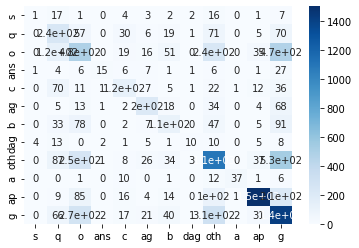

In [28]:
compare_mm_preds('BERT', 'dummy', bert_model_list)